In [12]:
# prep: import modules and get pwd
import pymysql
import numpy as np
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import seaborn as sns
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:
# get the data from the following tables: film, inventory and rental
# join the relevant columns to identify the film id
# based decisions on what column to bring in based on likely hood to affect the prediction mdoel


connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''SELECT film.title, film.film_id, film.rental_rate, film.length, film.rating, film.special_features, rental.rental_date
FROM film
JOIN inventory ON film.film_id = inventory.film_id
JOIN rental ON inventory.inventory_id = rental.inventory_id;'''

data = pd.read_sql_query(query, engine)
data.head(50)
data.tail(50)

data.dtypes

title                       object
film_id                      int64
rental_rate                float64
length                       int64
rating                      object
special_features            object
rental_date         datetime64[ns]
dtype: object

In [60]:
# looking at the datatype, convert numerical columns to objets 

data['rental_rate'] = data['rental_rate'].astype('object')


In [4]:
# create a functiont to filter and group films that were rented in may 2005
# recheck the datatype 

def is_may_2005(date):
    return (date.month == 5) and (date.year == 2005)

data['rented_in_may'] = data['rental_date'].apply(is_may_2005)

may_df = data.groupby('title').agg({'rented_in_may': 'max', 'film_id':'first', 'rental_date':'first','rental_rate': 'first','rating':'first','special_features':'first'}).reset_index()

print(may_df.dtypes)
may_df

title                       object
rented_in_may                 bool
film_id                     object
rental_date         datetime64[ns]
rental_rate                 object
rating                      object
special_features            object
dtype: object


,title,rented_in_may,film_id,rental_date,rental_rate,rating,special_features
0,ACADEMY DINOSAUR,True,1,2005-07-08 19:03:15,0.99,PG,"Deleted Scenes,Behind the Scenes"
1,ACE GOLDFINGER,False,2,2005-08-01 04:24:47,4.99,G,"Trailers,Deleted Scenes"
2,ADAPTATION HOLES,True,3,2005-07-27 01:21:19,2.99,NC-17,"Trailers,Deleted Scenes"
3,AFFAIR PREJUDICE,True,4,2005-07-12 02:40:41,2.99,G,"Commentaries,Behind the Scenes"
4,AFRICAN EGG,True,5,2005-05-28 07:53:38,2.99,G,Deleted Scenes
...,...,...,...,...,...,...,...
953,YOUNG LANGUAGE,False,996,2005-07-08 23:51:26,0.99,G,"Trailers,Behind the Scenes"
954,YOUTH KICK,False,997,2005-07-27 10:21:15,0.99,NC-17,"Trailers,Behind the Scenes"
955,ZHIVAGO CORE,True,998,2005-06-17 03:19:20,0.99,NC-17,Deleted Scenes
956,ZOOLANDER FICTION,True,999,2005-07-06 11:40:27,2.99,R,"Trailers,Deleted Scenes"


In [61]:
# clean up the rental_date column by dropping the time

may_df['rental_date'] = may_df['rental_date'].dt.date

In [6]:
display(pd.crosstab(may_df.title, may_df.special_features))
display(pd.crosstab(may_df.rating, may_df.special_features))
display(pd.crosstab(may_df.rented_in_may, may_df.rating))
display(pd.crosstab(may_df.title, may_df.rating))

special_features,Behind the Scenes,Commentaries,"Commentaries,Behind the Scenes","Commentaries,Deleted Scenes","Commentaries,Deleted Scenes,Behind the Scenes",Deleted Scenes,"Deleted Scenes,Behind the Scenes",Trailers,"Trailers,Behind the Scenes","Trailers,Commentaries","Trailers,Commentaries,Behind the Scenes","Trailers,Commentaries,Deleted Scenes","Trailers,Commentaries,Deleted Scenes,Behind the Scenes","Trailers,Deleted Scenes","Trailers,Deleted Scenes,Behind the Scenes"
title,,,,,,,,,,,,,,,
ACADEMY DINOSAUR,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
ACE GOLDFINGER,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
ADAPTATION HOLES,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
AFFAIR PREJUDICE,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
AFRICAN EGG,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YOUNG LANGUAGE,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
YOUTH KICK,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
ZHIVAGO CORE,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


special_features,Behind the Scenes,Commentaries,"Commentaries,Behind the Scenes","Commentaries,Deleted Scenes","Commentaries,Deleted Scenes,Behind the Scenes",Deleted Scenes,"Deleted Scenes,Behind the Scenes",Trailers,"Trailers,Behind the Scenes","Trailers,Commentaries","Trailers,Commentaries,Behind the Scenes","Trailers,Commentaries,Deleted Scenes","Trailers,Commentaries,Deleted Scenes,Behind the Scenes","Trailers,Deleted Scenes","Trailers,Deleted Scenes,Behind the Scenes"
rating,,,,,,,,,,,,,,,
G,11,13,15,10,7,13,12,16,8,9,14,13,13,10,7
NC-17,9,12,17,16,19,11,15,11,13,11,24,11,11,16,6
PG,15,11,14,13,13,8,12,10,9,14,12,13,9,14,16
PG-13,17,11,17,11,15,14,13,19,17,17,16,13,11,14,8
R,16,14,7,12,11,11,16,15,20,16,10,10,11,11,9


rating,G,NC-17,PG,PG-13,R
rented_in_may,,,,,
False,45,60,54,58,55
True,126,142,129,155,134


rating,G,NC-17,PG,PG-13,R
title,,,,,
ACADEMY DINOSAUR,0,0,1,0,0
ACE GOLDFINGER,1,0,0,0,0
ADAPTATION HOLES,0,1,0,0,0
AFFAIR PREJUDICE,1,0,0,0,0
AFRICAN EGG,1,0,0,0,0
...,...,...,...,...,...
YOUNG LANGUAGE,1,0,0,0,0
YOUTH KICK,0,1,0,0,0
ZHIVAGO CORE,0,1,0,0,0


/var/folders/yq/dfhgy0yx0t3dm3n1xyhjfyjw0000gn/T/ipykernel_51324/4021490259.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=may_df.corr()  # default


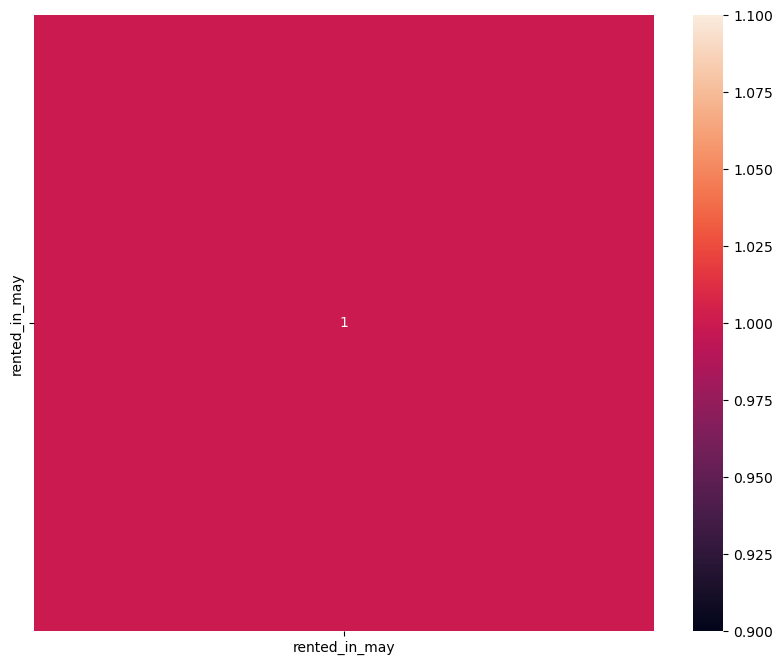

In [63]:
# no multicolinearity

corr_matrix=may_df.corr()  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

/Users/hysteria/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


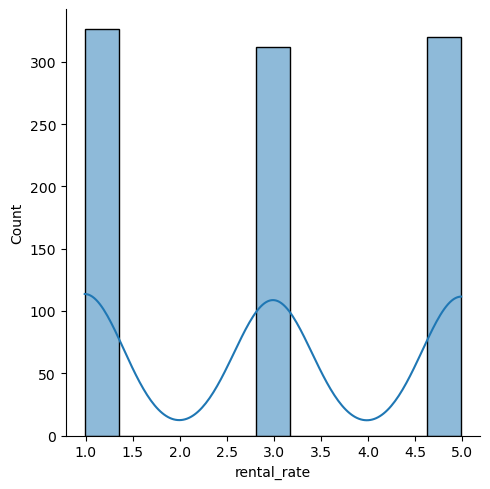

/Users/hysteria/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


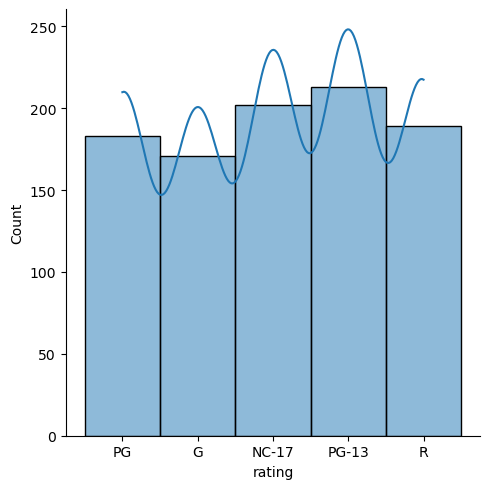

/Users/hysteria/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


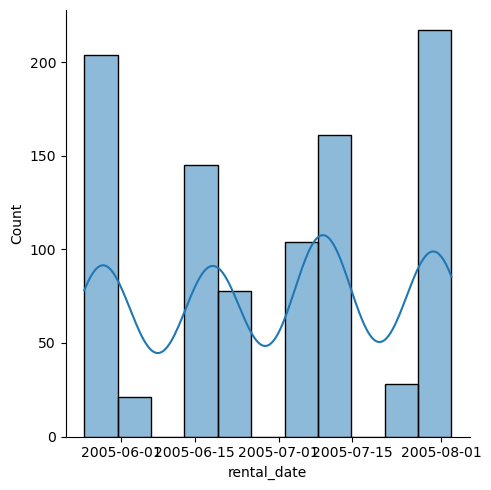

/Users/hysteria/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


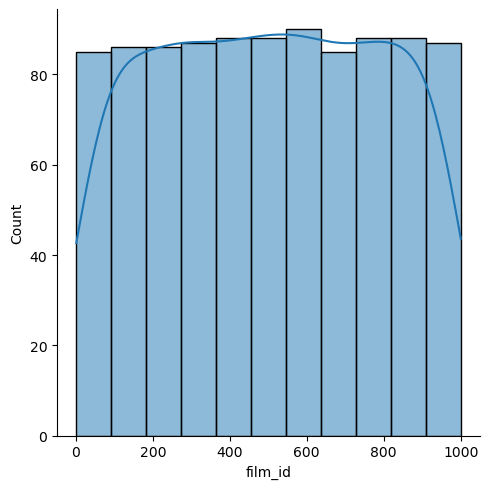

In [8]:
# look at the scale and distribution of values
# identified no clear patterns with rentals

sns.displot(may_df['rental_rate'], kde=True)
plt.show()

sns.displot(may_df['rating'], kde=True)
plt.show()

sns.displot(may_df['rental_date'], kde=True)
plt.show()

sns.displot(may_df['film_id'], kde=True)
plt.show()

In [45]:
# split X-y with the target value and categorical columns

y = may_df['rented_in_may']
X = may_df[['rental_rate', 'special_features','rating']]

In [46]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X_cat = may_df.select_dtypes(include = object)

# Scaling data
# transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
# X_train_normalized = transformer.transform(X_train_num)
# X_train_norm = pd.DataFrame(X_train_normalized, columns=X_num.columns)
# X_train_norm

In [48]:
# since there are no numerical values on the X there is no need for a minmax scaler


X_train_categorical = X_train.select_dtypes(include = object)
X_train_cat = pd.get_dummies(X_train_categorical, 
                             columns=['rental_rate', 'rating', 'special_features'],
                             drop_first=True)
X_train_cat.head()
X_train_categorical

/var/folders/yq/dfhgy0yx0t3dm3n1xyhjfyjw0000gn/T/ipykernel_51324/2910436505.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_train_cat = pd.get_dummies(X_train_categorical,


,rental_rate,special_features,rating
302,4.99,Trailers,PG-13
467,0.99,"Commentaries,Behind the Scenes",NC-17
294,0.99,"Trailers,Commentaries,Deleted Scenes,Behind th...",PG
548,0.99,"Trailers,Deleted Scenes",G
465,0.99,"Trailers,Commentaries",PG-13
...,...,...,...
106,0.99,"Trailers,Commentaries,Deleted Scenes,Behind th...",NC-17
270,0.99,"Commentaries,Deleted Scenes,Behind the Scenes",R
860,4.99,Deleted Scenes,PG-13
435,4.99,"Trailers,Commentaries",NC-17


In [49]:
# we encode the categorical columns

encoder = OneHotEncoder(drop="first").fit(X_cat)  # no hay que volver a crearlo

encoded = encoder.transform(X_cat).toarray()
print(encoded)
encoded_nominal_df=pd.DataFrame(encoded, columns = encoder.get_feature_names_out())
encoded_nominal_df

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


,title_ACE GOLDFINGER,title_ADAPTATION HOLES,title_AFFAIR PREJUDICE,title_AFRICAN EGG,title_AGENT TRUMAN,title_AIRPLANE SIERRA,title_AIRPORT POLLOCK,title_ALABAMA DEVIL,title_ALADDIN CALENDAR,title_ALAMO VIDEOTAPE,...,special_features_Deleted Scenes,"special_features_Deleted Scenes,Behind the Scenes",special_features_Trailers,"special_features_Trailers,Behind the Scenes","special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [64]:
X_train_transformed = np.concatenate([X_train_cat], axis=1)

In [51]:
X_train_transformed

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [52]:
# we apply the logistic regression model since this is a categorical target (true or false)

from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [53]:
predictions = classification.predict(X_test_transformed)
predictions
classification.score(X_test_transformed, y_test)

NameError: name 'X_test_transformed' is not defined

In [54]:
X_test_categorical = X_test.select_dtypes(include = object)
X_test_cat = pd.get_dummies(X_test_categorical, 
                             columns=['rental_rate', 'rating', 'special_features'],
                             drop_first=True)
X_test_cat.head()
X_test_categorical

/var/folders/yq/dfhgy0yx0t3dm3n1xyhjfyjw0000gn/T/ipykernel_51324/3847000409.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_test_cat = pd.get_dummies(X_test_categorical,


,rental_rate,special_features,rating
836,0.99,"Trailers,Commentaries,Deleted Scenes,Behind th...",G
477,2.99,Trailers,R
350,4.99,Commentaries,G
891,2.99,Commentaries,R
855,4.99,Behind the Scenes,PG
...,...,...,...
462,4.99,"Trailers,Commentaries,Behind the Scenes",R
673,2.99,"Trailers,Deleted Scenes",NC-17
33,2.99,"Trailers,Deleted Scenes",PG
31,0.99,"Commentaries,Deleted Scenes",NC-17


In [55]:
display(X_test_cat.head())
display(X_train_cat.head())

,rental_rate_2.99,rental_rate_4.99,rating_NC-17,rating_PG,rating_PG-13,rating_R,special_features_Commentaries,"special_features_Commentaries,Behind the Scenes","special_features_Commentaries,Deleted Scenes","special_features_Commentaries,Deleted Scenes,Behind the Scenes",special_features_Deleted Scenes,"special_features_Deleted Scenes,Behind the Scenes",special_features_Trailers,"special_features_Trailers,Behind the Scenes","special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes"
836,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
477,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
350,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
891,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
855,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,rental_rate_2.99,rental_rate_4.99,rating_NC-17,rating_PG,rating_PG-13,rating_R,special_features_Commentaries,"special_features_Commentaries,Behind the Scenes","special_features_Commentaries,Deleted Scenes","special_features_Commentaries,Deleted Scenes,Behind the Scenes",special_features_Deleted Scenes,"special_features_Deleted Scenes,Behind the Scenes",special_features_Trailers,"special_features_Trailers,Behind the Scenes","special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes"
302,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
467,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
294,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
465,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [56]:
list(X_train_cat.columns)==list(X_test_cat.columns)

True

In [58]:
X_test_transformed = np.concatenate([X_test_cat], axis=1)

In [59]:
predictions = classification.predict(X_test_transformed)
predictions
classification.score(X_test_transformed, y_test)

0.7083333333333334

In [66]:
print(y_test.value_counts())
pd.Series(predictions).value_counts()


True     136
False     56
Name: rented_in_may, dtype: int64


True    192
dtype: int64

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[  0,  56],
       [  0, 136]])